## Supervised machine learning prediction of breast cancer outcomes using the Wisconsin Breast Cancer Dataset

### The Objective of Machine Learning Analysis:

The goal of this project is to build machine learning models using supervised machine learning algorithms and analyze which ML model provides the best prediction of breast cancer outcomes (benign or malignant) according to characteristics of breast cancer cell nuclei. The Wisconsin Breast Cancer Dataset was used to train ML models. This dataset was downloaded from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The dataset contains a target attribute (diagnosis) and 30 attributes of characteristics of breast cancer cell nuclei.

### The description of the dataset:

Attributes in this dataset contain the diagnostic information (the target variable) and features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image.

#### Attribute Information:

* id number (patient ID)
* diagnosis (M = malignant, B = benign) 3-32)

#### Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

### An outline of the machine learning analysis plan:

1. The dataset was first examined to check whether there are any missing values in attributes. Missing values will be replaced by median values if they are found.
2. The categorical target variable (diagnosis) is engineered to be a dummy variable.
3. Analysis of data distribution of each characteristic feature and its skewness. Data transformation (e.g., log transformation, square root transformation) is performed when the skewness of the feature data is over 0.75.
4. As some supervised ML algorithms (e.g., kNN) are sensitive to the scale of data, scaling is performed before the dataset is used to train ML models.
5. Exploratory data analysis of the correlation between the target variable and feature variables.
6. Train and test datasets are generated from the engineered, scaled dataset using StratifiedShuffleSplit for training ML models and prediction analysis using these trained ML models.
7. ML models build from different Supervised ML algorithms are evaluated to identify the best model for the prediction of breast cancer outcomes.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys 
os.chdir('data')
from datasetup import colors, palette
sns.set_palette(palette)

In [2]:
filepath = 'WisconsinCancer.csv'
data = pd.read_csv(filepath, sep=',')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
# Two unnecessary attributes were removed.
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
# Examine the dimension of the dataset and column names.
# Number of rows
print(data.shape[0])

# Number of columns
print(data.shape[1])

# Column names
print(data.columns.tolist())

569
31
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Data Cleaning and Feature Engineering:

To check whether the dataset contains any missing values, **isnull( )** was used for this analysis.

In [8]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The analysis result shows that there are no missing values present in these 31 attributes.

The value counts of benign (B) and malignant (M) breast cancer cases in the target variable are:

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

To convert the categorical target variable to a dummy variable (0 for benign; 1 for malignant), **pandas.get_dummies( )** was used.

In [11]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [12]:
data.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [13]:
# The statistical summary of the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Analysis of skewness of feature data and data transformation:

To understand the data distribution of each feature, skewness analysis was performed. Skewness analysis (shown below) identified 24 feature variables have skewness > 0.75.

In [14]:
# Examine the skewness of variables in the dataset.
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [15]:
# Identify which variable has the skewness > 0.75.
data.skew().apply(np.abs) > 0.75

radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean      True
radius_se                   True
texture_se                  True
perimeter_se                True
area_se                     True
smoothness_se               True
compactness_se              True
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst           True
concavity_worst             True
concave points_worst       False
symmetry_worst              True
fractal_dimension_worst     True
diagnosis_

In [16]:
# The total number of variables with the skewness > 0.75
sum(data.skew().apply(np.abs) > 0.75)

24

The column names of feature variables with skewness > 0.75 are listed below:

In [17]:
skewed_vars = data.columns[data.skew().apply(np.abs) > 0.75]
skewed_vars

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

To reduce the skewness of these 24 variables, data transformation was conducted. Data transformation with square root and followed log transformation were found to be effective for the reduction of data skewness.

In [18]:
data2 = data.copy()
for col in skewed_vars:
    data2[col] = data2.loc[:, col].apply(np.sqrt).apply(np.log1p)

data2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,1.656600,10.38,2.491677,3.485495,0.11840,0.423225,0.436844,0.324643,0.2419,0.247292,...,17.33,2.680114,3.827190,0.1622,0.596550,0.611797,0.2654,0.517785,0.296259,1
1,1.711167,17.77,2.527984,3.622053,0.08474,0.247195,0.258347,0.234990,0.1812,0.213541,...,23.41,2.610186,3.811687,0.1238,0.359053,0.399801,0.1860,0.421604,0.261104,1
2,1.693290,21.25,2.517838,3.574711,0.10960,0.336383,0.367623,0.305741,0.2069,0.219078,...,25.53,2.591448,3.745734,0.1444,0.501706,0.513493,0.2430,0.470680,0.259236,1
3,1.476900,20.38,2.283193,3.027688,0.14250,0.427111,0.399665,0.280918,0.2597,0.271670,...,26.50,2.392731,3.211910,0.2098,0.657910,0.603657,0.2575,0.595942,0.347788,1
4,1.705555,14.34,2.535541,3.611293,0.10030,0.310727,0.368090,0.279868,0.1809,0.217165,...,16.67,2.590537,3.705891,0.1374,0.373472,0.490085,0.1625,0.396229,0.244586,1


In [19]:
# Examine the skewness of the transformed dataset.
data2.skew().apply(np.abs)

radius_mean                0.372840
texture_mean               0.650450
perimeter_mean             0.353032
area_mean                  0.310859
smoothness_mean            0.456324
compactness_mean           0.417717
concavity_mean             0.114137
concave points_mean        0.056933
symmetry_mean              0.725609
fractal_dimension_mean     1.021872
radius_se                  1.043736
texture_se                 0.348818
perimeter_se               0.930977
area_se                    0.923958
smoothness_se              1.127646
compactness_se             0.771264
concavity_se               0.488334
concave points_se          0.611419
symmetry_se                1.241744
fractal_dimension_se       1.649564
radius_worst               0.531746
texture_worst              0.498321
perimeter_worst            0.485291
area_worst                 0.477700
smoothness_worst           0.415426
compactness_worst          0.334523
concavity_worst            0.365761
concave points_worst       0

In [20]:
# Examine the total number of transformed variables with the skewness > 0.75
sum(data2.skew().apply(np.abs) > 0.75)

9

In [21]:
print("The maximal skewness of the untransformed dataset: {}".format(data.skew().apply(np.abs).max()))
print("The maximal skewness of the transformed dataset: {}".format(data2.skew().apply(np.abs).max()))

The maximal skewness of the untransformed dataset: 5.447186284898409
The maximal skewness of the transformed dataset: 1.6495638944206699


Data transformation significantly reduced the skewness of feature data and the number of feature variables with skewness > 0.75 decreased from 24 to 9. The maximal skewness was down from 5.447186 to 1.649564 after data transformation.

Data distribution of skewed feature variables before and after data transformation was visualized using the **hist( )** function.

In [22]:
# Create a dataset containing only variables with the skewness > 0.75
skewed_data = data[skewed_vars]
skewed_data.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,0.07871,1.0950,0.9053,8.589,...,0.01587,0.03003,0.006193,25.38,184.60,2019.0,0.6656,0.7119,0.4601,0.11890
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.05667,0.5435,0.7339,3.398,...,0.01340,0.01389,0.003532,24.99,158.80,1956.0,0.1866,0.2416,0.2750,0.08902
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.05999,0.7456,0.7869,4.585,...,0.02058,0.02250,0.004571,23.57,152.50,1709.0,0.4245,0.4504,0.3613,0.08758
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.09744,0.4956,1.1560,3.445,...,0.01867,0.05963,0.009208,14.91,98.87,567.7,0.8663,0.6869,0.6638,0.17300
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.05883,0.7572,0.7813,5.438,...,0.01885,0.01756,0.005115,22.54,152.20,1575.0,0.2050,0.4000,0.2364,0.07678


C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


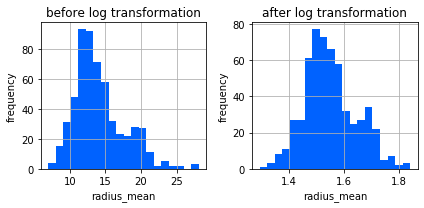

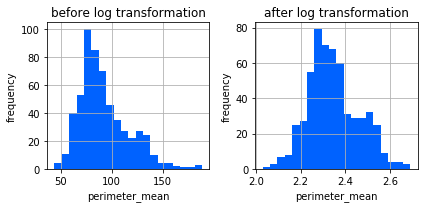

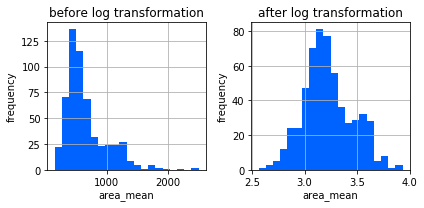

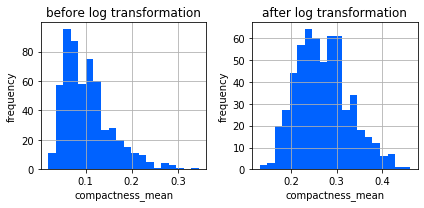

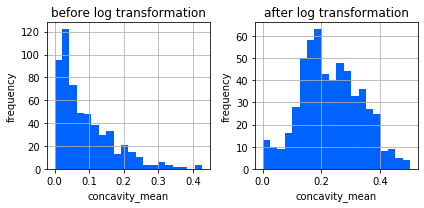

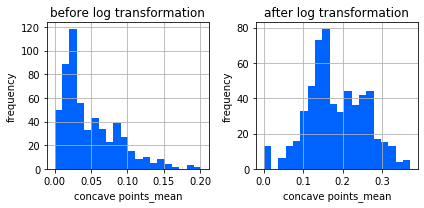

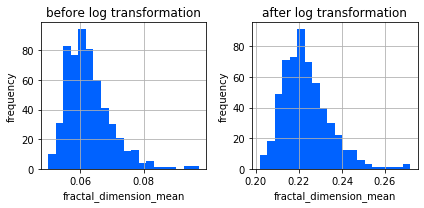

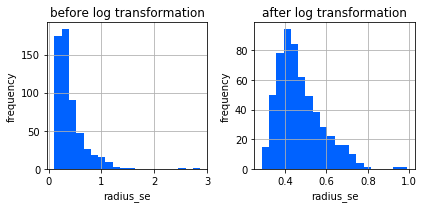

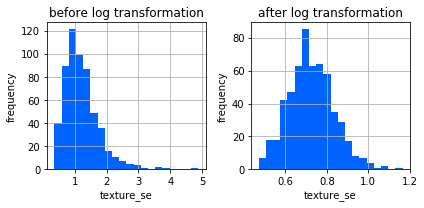

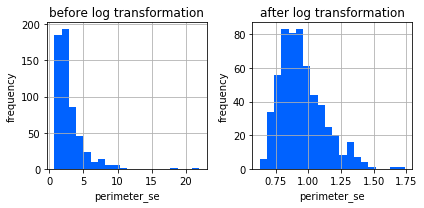

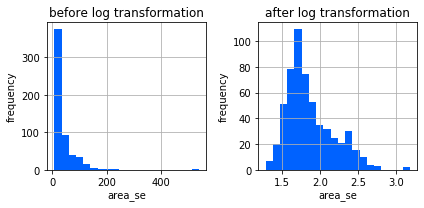

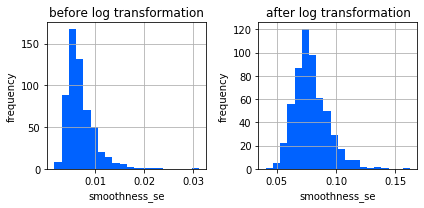

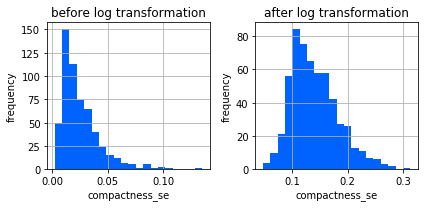

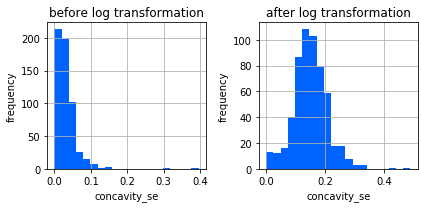

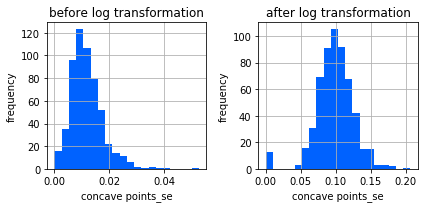

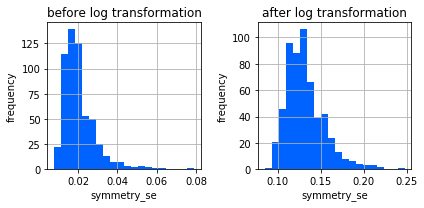

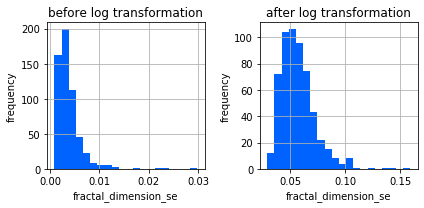

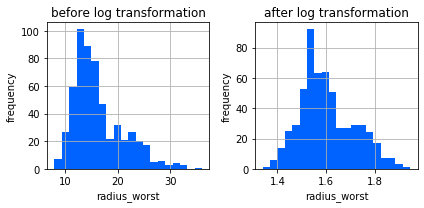

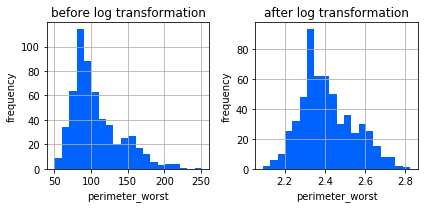

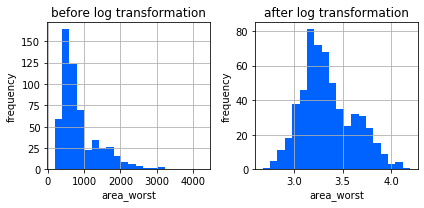

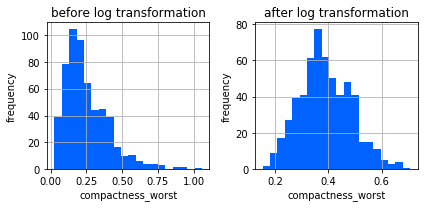

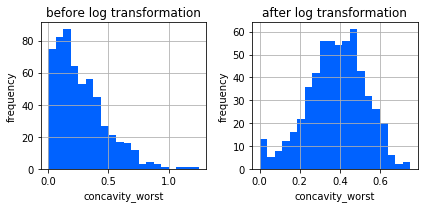

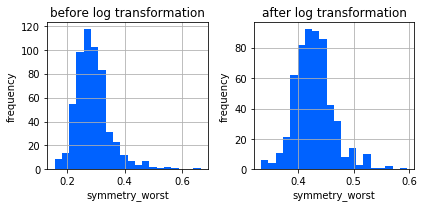

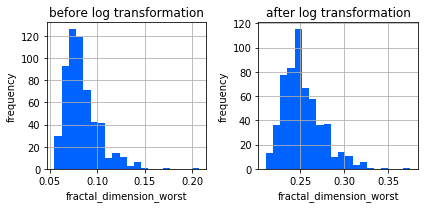

In [23]:
# Plot the distribution of untransformed and transformed variables.
for col in skewed_vars:    
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    skewed_data.loc[:, col].hist(ax=ax[0], bins=20).set(title='before log transformation', xlabel=col, ylabel='frequency')
    skewed_data.loc[:, col].apply(np.sqrt).apply(np.log1p).hist(ax=ax[1], bins=20).set(title='after log transformation', 
                                                                                       xlabel=col, ylabel='frequency')
    fig.tight_layout(); 

### The following code can be used to save the created plots.

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('multipage_pdf.pdf') as pdf:

    for col in skewed_vars:  
    
        fig, ax = plt.subplots(1, 2, figsize=(6, 3))
        
        skewed_data.loc[:, col].hist(ax=ax[0], bins=20).set(title='before sqrt-log transformation', xlabel=col, ylabel='frequency')
        
        skewed_data.loc[:, col].apply(np.sqrt).apply(np.log1p).hist(ax=ax[1], bins=20).set(title='after sqrt-log transformation', xlabel=col, ylabel='frequency')
        
        fig.tight_layout()
        
        pdf.savefig()
        
        plt.close()

### Data scaling and exploratory data analysis:

Before scaling of numeric variables, numeric feature variables and the target variable were stored in separate objects (X and y).

In [24]:
X = data2.drop('diagnosis_M', axis=1)
y = data2.diagnosis_M
cols = X.columns.tolist()

The **MinMaxScaler()** function from **sklearn.preprocessing** was used to scale the numeric dataset (X).

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [26]:
X

array([[0.66394718, 0.0226581 , 0.69946631, ..., 0.91202749, 0.70239372,
        0.51944641],
       [0.76347118, 0.27257355, 0.75452614, ..., 0.63917526, 0.33615059,
        0.3058802 ],
       [0.73086605, 0.3902604 , 0.73913948, ..., 0.83505155, 0.52302397,
        0.29453263],
       ...,
       [0.60483432, 0.62123774, 0.61230886, ..., 0.48728522, 0.20024556,
        0.21765614],
       [0.76456021, 0.66351031, 0.79137598, ..., 0.91065292, 0.61284042,
        0.55241194],
       [0.07049137, 0.50152181, 0.05954084, ..., 0.        , 0.36455236,
        0.14923609]])

As the output from **MinMaxScaler( )** is a numpy array, **pandas.DataFrame( )** was used to re-create the X data frame with scaled feature data.

In [27]:
X = pd.DataFrame(X, columns=cols)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.663947,0.022658,0.699466,0.673753,0.593753,0.882314,0.868868,0.876074,0.686364,0.651447,...,0.755694,0.141525,0.803133,0.757950,0.601136,0.800178,0.814740,0.912027,0.702394,0.519446
1,0.763471,0.272574,0.754526,0.773527,0.289880,0.352030,0.513844,0.634139,0.379798,0.168880,...,0.745060,0.303571,0.707661,0.747693,0.347553,0.371832,0.532422,0.639175,0.336151,0.305880
2,0.730866,0.390260,0.739139,0.738937,0.514309,0.620706,0.731191,0.825067,0.509596,0.248046,...,0.705015,0.360075,0.682078,0.704056,0.483590,0.629119,0.683828,0.835052,0.523024,0.294533
3,0.336190,0.360839,0.383304,0.339264,0.811321,0.894021,0.794921,0.758081,0.776263,1.000000,...,0.398741,0.385928,0.410771,0.350857,0.915472,0.910846,0.803900,0.884880,1.000000,0.832480
4,0.753237,0.156578,0.765985,0.765665,0.430351,0.543420,0.732120,0.755246,0.378283,0.220690,...,0.674562,0.123934,0.680834,0.677694,0.437364,0.397837,0.652655,0.558419,0.239528,0.205536


The scaled X dataset was checked by **describe( )** to confirm that all of numeric data have been scaled between 0 and 1.

In [28]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,0.468988,0.171588,0.0,0.353259,0.448113,0.567833,1.0
texture_mean,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter_mean,569.0,0.478529,0.172379,0.0,0.361833,0.455555,0.584971,1.0
area_mean,569.0,0.482241,0.169528,0.0,0.368798,0.463461,0.586808,1.0
smoothness_mean,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean,569.0,0.423706,0.176242,0.0,0.291108,0.407795,0.536108,1.0
concavity_mean,569.0,0.460642,0.205236,0.0,0.315554,0.440757,0.613806,1.0
concave points_mean,569.0,0.491733,0.196275,0.0,0.359533,0.453575,0.649315,1.0
symmetry_mean,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0
fractal_dimension_mean,569.0,0.307847,0.155746,0.0,0.193730,0.284109,0.387589,1.0


To understand which feature variable correlates with breast cancer outcomes, the **corrwith( )** function was used.

In [29]:
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)
correlations

smoothness_se             -0.064665
symmetry_se               -0.035323
fractal_dimension_mean    -0.017627
texture_se                 0.020172
fractal_dimension_se       0.131424
fractal_dimension_worst    0.324215
symmetry_mean              0.330499
compactness_se             0.343046
smoothness_mean            0.358560
concavity_se               0.391813
symmetry_worst             0.410598
texture_mean               0.415185
smoothness_worst           0.421465
concave points_se          0.423525
texture_worst              0.456903
compactness_worst          0.601766
compactness_mean           0.605849
radius_se                  0.627008
perimeter_se               0.633122
concavity_worst            0.650054
concavity_mean             0.713630
area_se                    0.723855
radius_mean                0.728456
area_mean                  0.728763
perimeter_mean             0.742619
concave points_mean        0.765324
area_worst                 0.784560
radius_worst               0

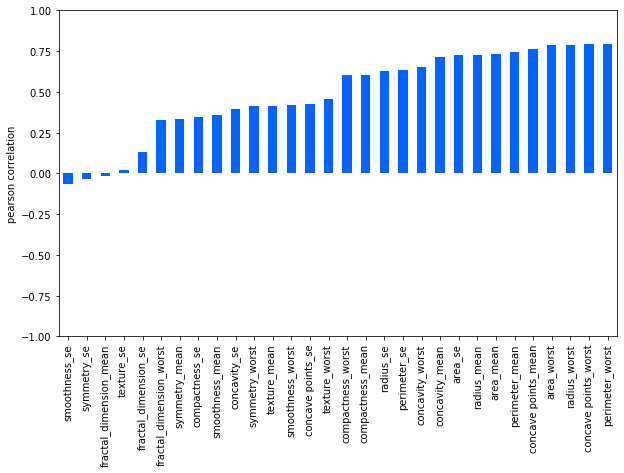

In [30]:
# The correlation was visualized by barplot.
ax = correlations.plot(kind='bar', color=colors[0], figsize=(10, 6))
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

#### Use the following code to save the plot in a pdf file:

ax = correlations.plot(kind='bar', color=colors[0], figsize=(10, 4))

ax.set(ylim=[-1, 1], ylabel='pearson correlation')

plt.savefig('corr_bar_plot.pdf')

plt.close()

The correlation analysis indicates that six features (area, compactness, concave points, concavity, perimeter, radius) are significantly correlated with breast cancer outcomes in a positive manner (pearson correlation > 0.5).

### Training supervised machine learning models for the classification prediction:

In this project, four different supervised ML algorithms, including logistic regression, kNN, SVM and tree-based modeling (random forest, extra trees), were used to train ML models for the classification prediction.

Before the training of ML models, the X data frame and the y target variable were used to generate their train and test data through the **StratifiedShuffleSplit()** function from **sklearn.model_selection**.

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, y))

# Create the dataframes
X_train = X.iloc[train_idx, :]
y_train = y[train_idx]

X_test  = X.iloc[test_idx, :]
y_test  = y[test_idx]

The probability of malignant breast cancer cases in train and test data was analyzed. The results show that the probability of malignant cases in the train data (0.372) is very close to that in the test data (0.374).

In [32]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis_M, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis_M, dtype: float64

### (1) Logistic Regression Modeling:

To train logistic regression models, two algorithmic methods, **LogisticRegression** and **LogisticRegressionCV** from **sklearn.linear_model**, were used. For the **LogisticRegressionCV** method, two regularization methods (L1 and L2) were tested in model training.

In [34]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
# liblinear is one of solvers that can be used for multiple classification (one vs all)
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)

In [35]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_auc_score

To evaluate how good these trained logistic regression models are, **classification_report**, and **confusion_matrix** analyses were performed.

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [37]:
# confusion matrix for prediction by logistic regression
con = confusion_matrix(y_test, y_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,107,0
true_malignant,7,57


In [38]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression, Cs is the reverse of lambda, l1 means L1 regularization
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
y1_pred = lr_l1.predict(X_test)
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [40]:
# confusion matrix for prediction by L1 regularized logistic regression
con = confusion_matrix(y_test, y1_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,106,1
true_malignant,3,61


In [41]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [42]:
y2_pred = lr_l2.predict(X_test)
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [43]:
# confusion matrix for prediction by L2 regularized logistic regression
con = confusion_matrix(y_test, y2_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,107,0
true_malignant,4,60


To evaluate how good these trained logistic regression models are, **classification_report** and **confusion_matrix** analyses were used. The results show that the inclusion of regularization penalty improved the accuracy, precision, recall/sensitivity and f1 score of prediction.

In [44]:
# Examine the parameters in logistic regression models
VARS = pd.DataFrame(X.columns, columns=['Variables'])
LR = pd.DataFrame(lr.coef_.T, columns=['LR'])
LR_L1 = pd.DataFrame(lr_l1.coef_.T, columns=['LR_L1'])
LR_L2 = pd.DataFrame(lr_l2.coef_.T, columns=['LR_L2'])

LR_coef_df = pd.concat([VARS, LR, LR_L1, LR_L2], axis = 1)
LR_coef_df

,Variables,LR,LR_L1,LR_L2
0,radius_mean,0.190462,0.000000,0.132761
1,texture_mean,0.821858,4.974472,1.547823
2,perimeter_mean,0.238853,0.000000,0.199667
3,area_mean,0.101954,0.000000,0.035602
4,smoothness_mean,-0.177170,10.060481,-0.093495
5,compactness_mean,0.406260,-17.560264,0.133302
6,concavity_mean,1.529535,13.952245,2.302971
7,concave points_mean,1.446085,10.249925,2.070867
8,symmetry_mean,-0.214887,-8.891712,-0.295143
9,fractal_dimension_mean,-1.036454,0.000000,-1.387278


### (2) K Nearest Neighbors (kNN) Modeling:

To train kNN models, **KNeighborsClassifer** from **sklearn.neighbors** was used. To identify the best k parameter for the kNN model, a range of k values (from 1 to 40) was tested in kNN modeling.


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
## Perform kNN modeling
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = round(1-accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score']) 
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])
df_f1_err = pd.concat([f1_results, error_results], axis = 1)

In [49]:
# find the k with the highest f1 score and the lowest error
print('Highest f1 score: {0}    Lowest error: {1}'.format(f1_results['F1 Score'].max(), error_results['Error Rate'].min()))
df_f1_err.loc[f1_results['F1 Score']==f1_results['F1 Score'].max(), :]

Highest f1 score: 0.9593    Lowest error: 0.0292


,K,F1 Score,K,Error Rate
2,3,0.9593,3,0.0292
3,4,0.9593,4,0.0292
4,5,0.9593,5,0.0292
5,6,0.9593,6,0.0292
7,8,0.9593,8,0.0292
8,9,0.9593,9,0.0292


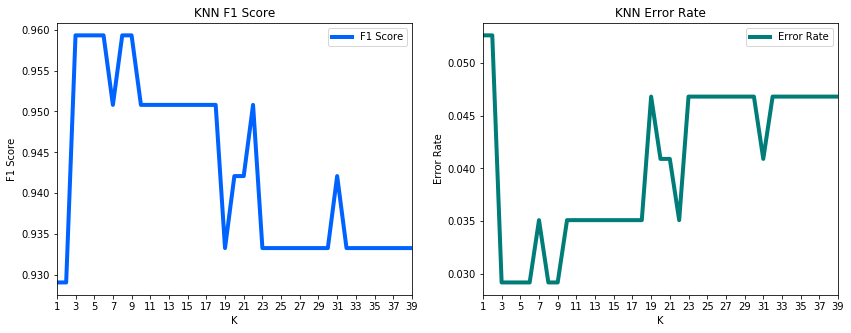

In [55]:
# The results of f1 scores and errors for predicted y values were plotted
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
f1_results.set_index('K').plot(ax=ax[0], color=colors[0], linewidth=4).set(title='KNN F1 Score', 
                                                                                 xlabel='K', ylabel='F1 Score')
ax[0].set_xticks(range(1, max_k, 2))
error_results.set_index('K').plot(ax=ax[1], color=colors[1], linewidth=4).set(title='KNN Error Rate', 
                                                                    xlabel='K', ylabel='Error Rate')
ax[1].set_xticks(range(1, max_k, 2));

Based on analysis results shown above, the minimal value of k for the kNN model to predict the best y data is 3. The **classification_report** and **confusion_matrix** methods were used to evaluate the kNN model (k=3).

In [56]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_train, y_train)
    
y_pred = knn.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [58]:
# confusion matrix for kNN prediction
con = confusion_matrix(y_test, y_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,107,0
true_malignant,5,59


### (3) Support Vector Machine (SVM) Modeling:

To train the SVM model, **LinearSVC** from **sklearn.svm** was used.

In [61]:
from sklearn.svm import LinearSVC

# Perform SVM modeling with L1 regularization
LSVC1 = LinearSVC(penalty='l1', dual=False)
LSVC1 = LSVC1.fit(X_train, y_train)
y1_pred = LSVC1.predict(X_test)

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The **classification_report** and **confusion_matrix** methods were used to evaluate the trained SVM model.

In [62]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [63]:
# confusion matrix for prediction by L1 regularized svm model
con = confusion_matrix(y_test, y1_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,106,1
true_malignant,3,61


In [64]:
# Perform SVM modeling with L2 regularization
LSVC2 = LinearSVC(penalty='l2')
LSVC2 = LSVC2.fit(X_train, y_train)
y2_pred = LSVC2.predict(X_test)

In [65]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [66]:
# confusion matrix for prediction by L2 regularized svm model
con = confusion_matrix(y_test, y2_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,107,0
true_malignant,2,62


The evaluation results indicate that SVM modeling with L2 regularization provides the best prediction.

To understand the impact of data transformation and scaling on prediction by SVM modeling, feature data without transformation and scaling were used to train the SVM model.

In [67]:
X2 = data.drop('diagnosis_M', axis=1)
y2 = data2.diagnosis_M

# Create train and test datasets from the dataset without tansformation and scaling
X2_train = X2.iloc[train_idx, :]
y2_train = y2[train_idx]

X2_test  = X2.iloc[test_idx, :]
y2_test  = y2[test_idx]

In [68]:
LSVC3 = LinearSVC(penalty='l2')
LSVC3 = LSVC3.fit(X2_train, y2_train)
y3_pred = LSVC3.predict(X2_test)

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [69]:
print(classification_report(y2_test, y3_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       107
           1       1.00      0.72      0.84        64

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171



In [70]:
# confusion matrix for prediction by L2 regularized svm model
con = confusion_matrix(y2_test, y3_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,107,0
true_malignant,18,46


In [71]:
X3 = data2.drop('diagnosis_M', axis=1)
y2 = data2.diagnosis_M

# Create train and test datasets from the dataset with transformation but without scaling
X3_train = X3.iloc[train_idx, :]
y2_train = y2[train_idx]

X3_test  = X3.iloc[test_idx, :]
y2_test  = y2[test_idx]

In [72]:
LSVC4 = LinearSVC(penalty='l2')
LSVC4 = LSVC4.fit(X3_train, y2_train)
y4_pred = LSVC4.predict(X3_test)

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
print(classification_report(y2_test, y4_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.98      0.84      0.91        64

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



In [74]:
# confusion matrix for prediction by L2 regularized svm model
con = confusion_matrix(y2_test, y4_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,106,1
true_malignant,10,54


The results from classification reports and confusion matrix analyses demonstrate that data transformation dramatically improved the prediction of the SVM model and data scaling further improve it.

### (4) Tree-based ML Modeling:

To train tree-based ML models, both **RandomForestClassifier** and **ExtraTreesClassifier** from **sklearn.ensemble** were used.

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for the number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 600]:
    
    # Use iterated n_trees to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store the oob error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.067839
20.0,0.062814
30.0,0.050251
40.0,0.055276
50.0,0.047739
100.0,0.042714
150.0,0.045226
200.0,0.047739
300.0,0.047739


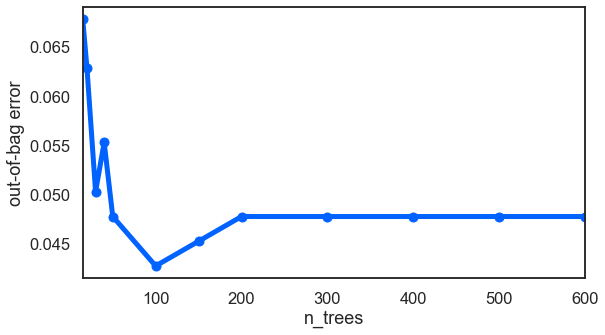

In [77]:
# Plot error rates for RF models with different tree numbers
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(9, 5), linewidth=5)
ax.set(ylabel='out-of-bag error');

The above plot shows that the RF model with 100 trees has a lowest prediction error.

In [78]:
# Train the RF model with 100 trees
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=False,
                            n_jobs=-1)
# Use this to set the number of trees
RF.set_params(n_estimators=100)

# Fit the model
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [79]:
print('Classification Report for the RF prediction\n', classification_report(y_test, y_pred))

Classification Report for the RF prediction
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [80]:
# confusion matrix for RandomForest prediction 
con = confusion_matrix(y_test, y_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,107,0
true_malignant,7,57


In [81]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the ExtraTrees estimator
# Note that the number of trees is not setup here
ET = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for the number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 600]:
    
    # Use this to set the number of trees
    ET.set_params(n_estimators=n_trees)
    ET.fit(X_train, y_train)

    # oob error
    oob_error = 1 - ET.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.075377
20.0,0.070352
30.0,0.055276
40.0,0.052764
50.0,0.050251
100.0,0.045226
150.0,0.042714
200.0,0.042714
300.0,0.042714


In [82]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.067839,0.075377
20.0,0.062814,0.070352
30.0,0.050251,0.055276
40.0,0.055276,0.052764
50.0,0.047739,0.050251
100.0,0.042714,0.045226
150.0,0.045226,0.042714
200.0,0.047739,0.042714
300.0,0.047739,0.042714


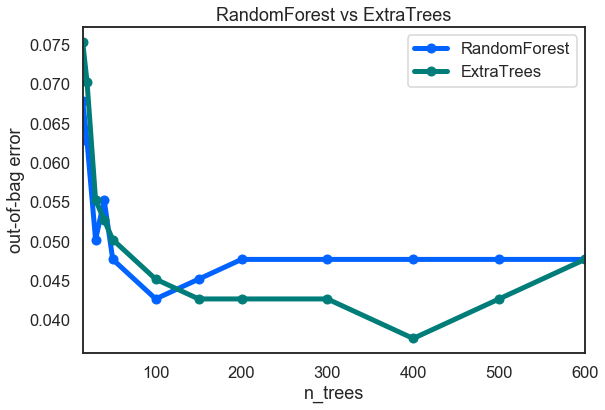

In [84]:
## Plot error rates for both RandomForest and ExtraTrees models with different tree numbers
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(9, 6), linewidth=5)
ax.set(title='RandomForest vs ExtraTrees', ylabel='out-of-bag error');

The above plot shows that the ExtraTrees model with 400 trees has a lowest prediction error.

In [85]:
ET = ExtraTreesClassifier(n_estimators=400,
                          oob_score=True, 
                          random_state=42, 
                          warm_start=False,
                          bootstrap=True,
                          n_jobs=-1)
ET = ET.fit(X_train, y_train)
y_pred = ET.predict(X_test)

In [86]:
print('Classification Report for the ET prediction\n', classification_report(y_test, y_pred))

Classification Report for the ET prediction
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [87]:
# confusion matrix for ExtraTrees prediction 
con = confusion_matrix(y_test, y_pred)
con_df = pd.DataFrame({'predicted_benign':con[:,0], 'predicted_malignant':con[:,1]}, index=['true_benign', 'true_malignant'])
con_df

,predicted_benign,predicted_malignant
true_benign,107,0
true_malignant,5,59


Classification_report and confusion_matrix analyses show that the extra trees model provides a better prediction than the random forest model.

### Conclusion:

Four different types of supervised ML algorithms were trained and used to predict breast cancer outcomes using the Wisconsin Breast Cancer Dataset. According to analyses of accuracy, precision, recall and f1 score of predictions from these trained ML models, the SVM-based ML model provides the best prediction of breast cancer outcomes (accuracy = 0.99, precision = 0.99, recall/sensitivity = 0.99, f1 score = 0.99, weighted averages). Therefore, SVM is the recommended ML algorithm for the prediction of breast cancer outcomes according to characteristics of breast cancer cell nuclei.